#  Import Statements

In [1]:
import pandas as pd
import sklearn
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
df = pd.read_csv('data/data.csv')
cpi = pd.read_csv('data/cpi.csv')
df.head()
cpi.head()

,Quarter,CPI
0,2021Q1,117.9
1,2021Q2,118.8
2,2021Q3,119.7
3,2021Q4,121.3
4,2022Q1,123.9


# Preprocessing

In [37]:
# Price adjustment for inflation
df['BCreatedDateAEST'] = pd.to_datetime(df['BCreatedDateAEST']);
df['Quarter'] = df['BCreatedDateAEST'].dt.to_period('Q');
cpi['Quarter'] = pd.to_datetime(cpi['Quarter']).dt.to_period('Q');
base_cpi = cpi['CPI'].iloc[-1]

/tmp/ipykernel_3131/1965790900.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['BCreatedDateAEST'] = pd.to_datetime(df['BCreatedDateAEST']);
/tmp/ipykernel_3131/1965790900.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cpi['Quarter'] = pd.to_datetime(cpi['Quarter']).dt.to_period('Q');


In [38]:
merged_df = df.merge(cpi, on='Quarter');
merged_df['Quarter'] = df['BCreatedDateAEST'].dt.quarter;

#Round to two decimal places to remain consistent with the existing data
merged_df['adjusted_price'] = round(merged_df['PriceIncGSTRaw'] * (base_cpi / merged_df['CPI']), 2)

In [39]:

pd.set_option('display.max_columns', None)

merged_df.head()


,FCID,BookingID,BCreatedDateAEST,BTicketID,BTicketType,TaskName,IsCustomService,IsCustomRepair,PriceIncGSTRaw,VYMM,VMakeModel,VMake,VYear,BShopID,BShopPostcode,BShopState,BShopRegionName,BShopRegionClass,Quarter,CPI,adjusted_price
0,1,463259,2021-06-17,708763,Capped,Capped Price - 30K,0,0,180.00,2019 TOYOTA COROLLA,TOYOTA COROLLA,TOYOTA,2019,17885,4102,QLD,Brisbane,1,2,118.8,211.21
1,2,1360052,2024-01-11,2122072,Capped,Capped Price - 50K,0,0,315.90,2021 MAZDA CX-5,MAZDA CX-5,MAZDA,2021,17739,2285,NSW,Lake Macquarie,2,1,137.4,320.50
2,1,1058706,2022-10-19,1633633,Repair,Replace Wiper Blades,0,0,120.00,2020 SKODA KAROQ,SKODA KAROQ,SKODA,2020,19138,3192,VIC,Melbourne,1,4,130.8,127.89
3,2,1078043,2022-11-11,1664447,Logbook,Logbook - 60K / 48m,0,0,462.10,2018 MITSUBISHI ASX,MITSUBISHI ASX,MITSUBISHI,2018,17667,2170,NSW,Sydney,1,4,130.8,492.48
4,2,1868175,2024-07-30,3101426,Capped,Capped Price - 30K,0,0,359.21,2020 MAZDA 3,MAZDA 3,MAZDA,2020,17410,3041,VIC,Melbourne,1,3,139.1,359.98


# Data Splitting

Index(['FCID', 'BookingID', 'BCreatedDateAEST', 'BTicketID', 'BTicketType',
       'TaskName', 'IsCustomService', 'IsCustomRepair', 'PriceIncGSTRaw',
       'VYMM', 'VMakeModel', 'VMake', 'VYear', 'BShopID', 'BShopPostcode',
       'BShopState', 'BShopRegionName', 'BShopRegionClass', 'Quarter', 'CPI',
       'adjusted_price'],
      dtype='object')
Index(['FCID', 'BookingID', 'BCreatedDateAEST', 'BTicketID', 'BTicketType',
       'TaskName', 'IsCustomService', 'IsCustomRepair', 'PriceIncGSTRaw',
       'VYMM', 'VMakeModel', 'VMake', 'VYear', 'BShopID', 'BShopPostcode',
       'BShopState', 'BShopRegionName', 'BShopRegionClass', 'Quarter', 'CPI',
       'adjusted_price'],
      dtype='object')
Index(['FCID', 'BookingID', 'BCreatedDateAEST', 'BTicketID', 'BTicketType',
       'TaskName', 'IsCustomService', 'IsCustomRepair', 'PriceIncGSTRaw',
       'VYMM', 'VMakeModel', 'VMake', 'VYear', 'BShopID', 'BShopPostcode',
       'BShopState', 'BShopRegionName', 'BShopRegionClass', 'Quarter', 'C

## Encoding Categoricals

In [ ]:
# First extract the number of unique categories (determine cardinality)
# With the cardinality, we can evaluate for which is the most suitable encoding method.

FCIDCategories = merged_df['FCID'].nunique()
print(f"FCID has {FCIDCategories} categories") #9

ticketTypeCategories = merged_df['BTicketType'].nunique()
print(f"BTicketType has {ticketTypeCategories} categories") #7

taskNameCategories = merged_df['TaskName'].nunique()
print(f"TaskName has {taskNameCategories} categories") #2721

VYMMCategories = merged_df['VYMM'].nunique()
print(f"VYMM has {VYMMCategories} categories") #5192

VMakeModelCategories = merged_df['VMakeModel'].nunique()
print(f"VMakeModel has {VMakeModelCategories} categories") #1941 

VMakeCategories = merged_df['VMake'].nunique()
print(f"VMake has {VMakeCategories} categories") # 360

BShopIDCategories = merged_df['BShopID'].nunique()
print(f"BShopID has {BShopIDCategories} categories") # 5894

BShopStateCategories = merged_df['BShopState'].nunique()
print(f"BShopState has {BShopStateCategories} categories") # 8

BShopRegionNameCategories = merged_df['BShopRegionName'].nunique()
print(f"BShopRegionName has {BShopRegionNameCategories} categories") # 119

# Results show that ticketType and BShop state have low cardinality, remaining predictors have high cardinality


FCID has 9 categories
BTicketType has 7 categories
TaskName has 2721 categories
VYMM has 5192 categories
VMakeModel has 1941 categories
VMake has 360 categories
BShopID has 5894 categories
BShopState has 8 categories
BShopRegionName has 119 categories


### Category Distributions

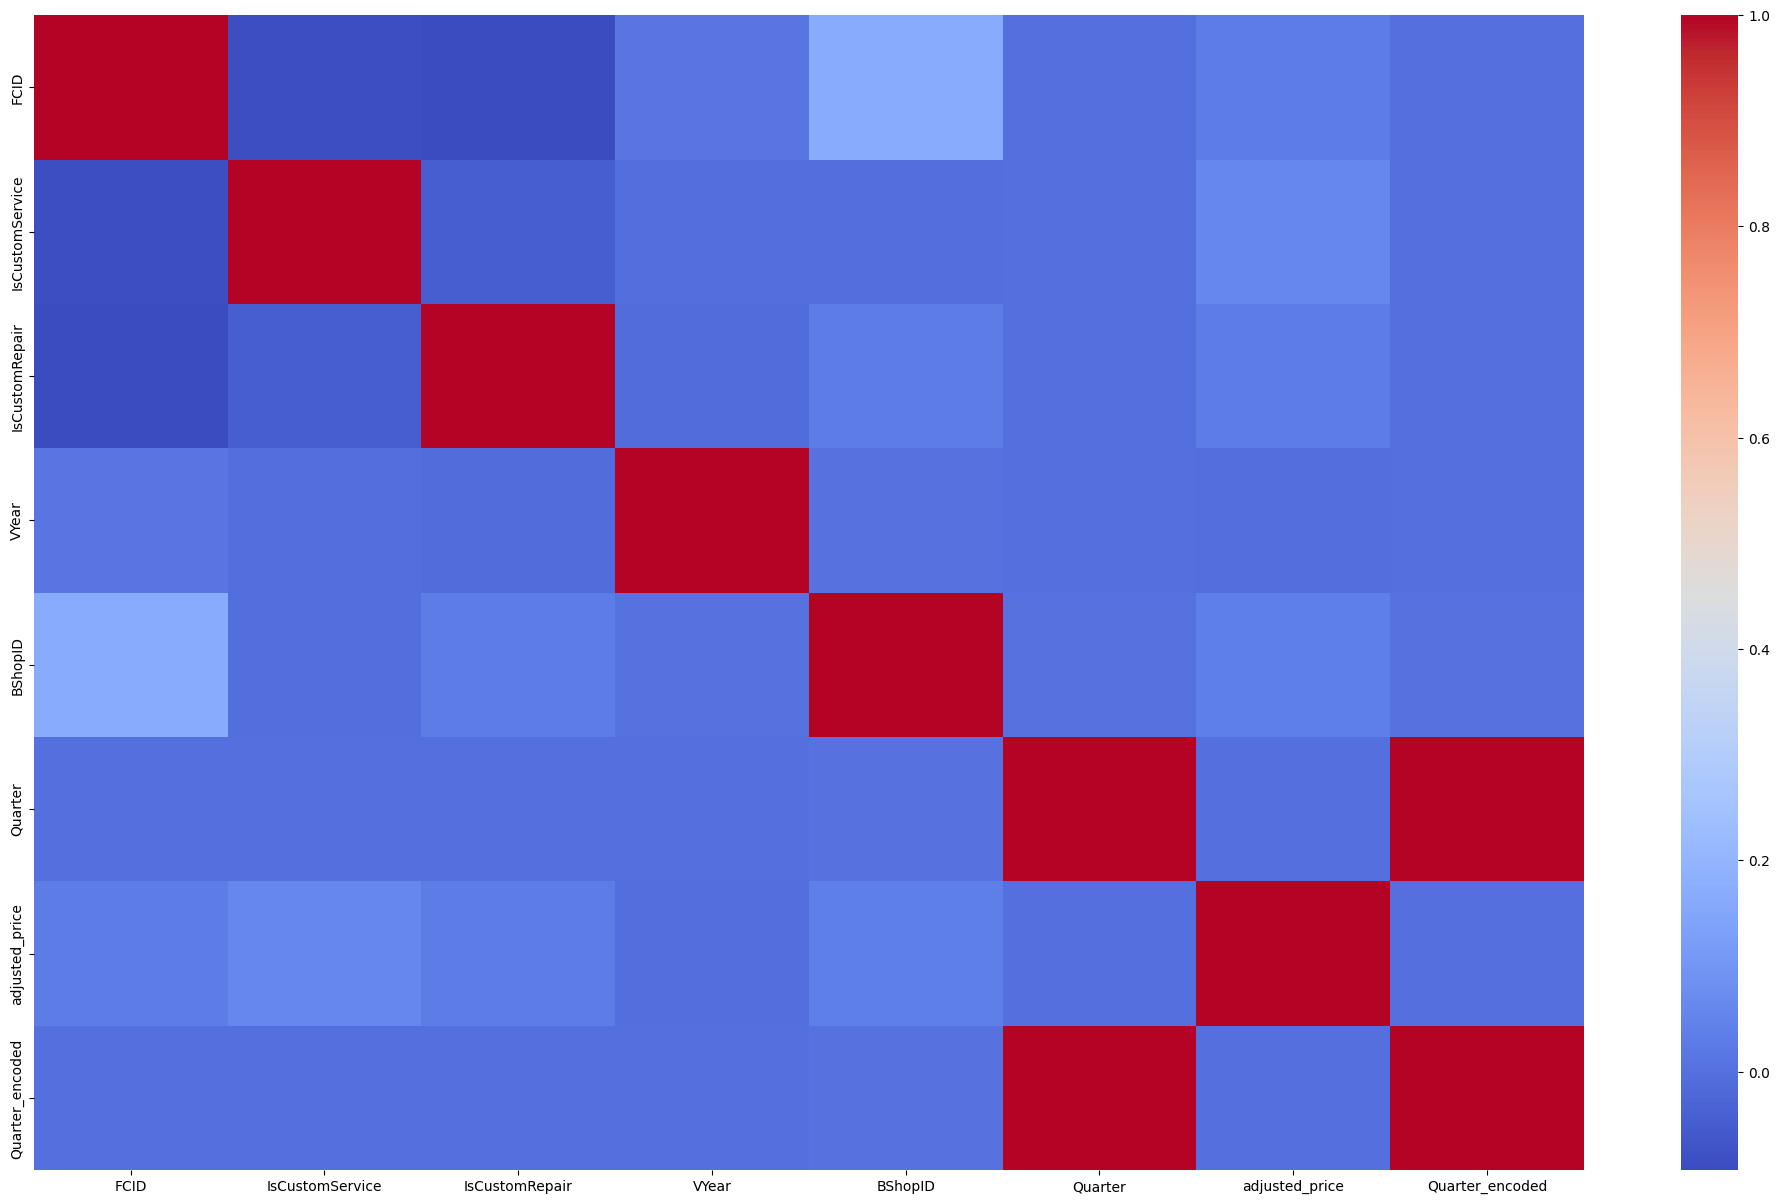

In [42]:
#Binary encoded features won't reveal useful insights
ex = merged_df.corr(numeric_only=True) 

plt.figure(figsize=(25, 15))
sns.heatmap(ex, annot=False, fmt=".2f", cmap="coolwarm")
plt.show()

We can see high correlation between FCID, BookingID and TicketID. Also, the CPI with the ID features.

The adjusted price and PriceIncGSTRaw are highly correlated. This could be worth investigating, removing the PriceIncGSTRAW could reduce complexity with minimal impact on performance.

In the following cells, we generate distributions for each categorical feature

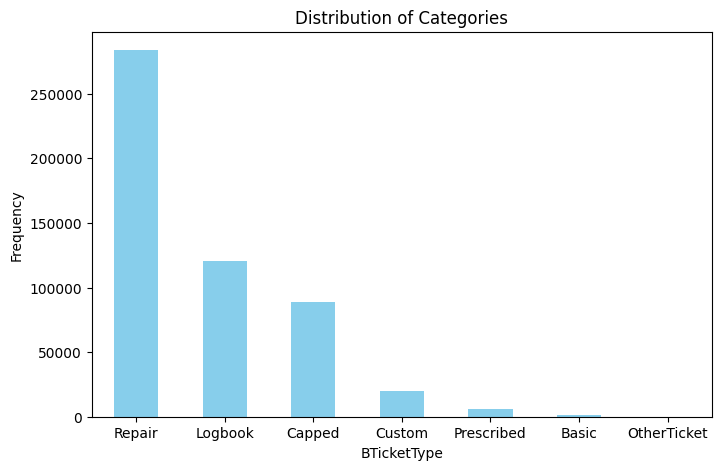

In [43]:
# Count frequency of each category
counts = merged_df['BTicketType'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('BTicketType')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



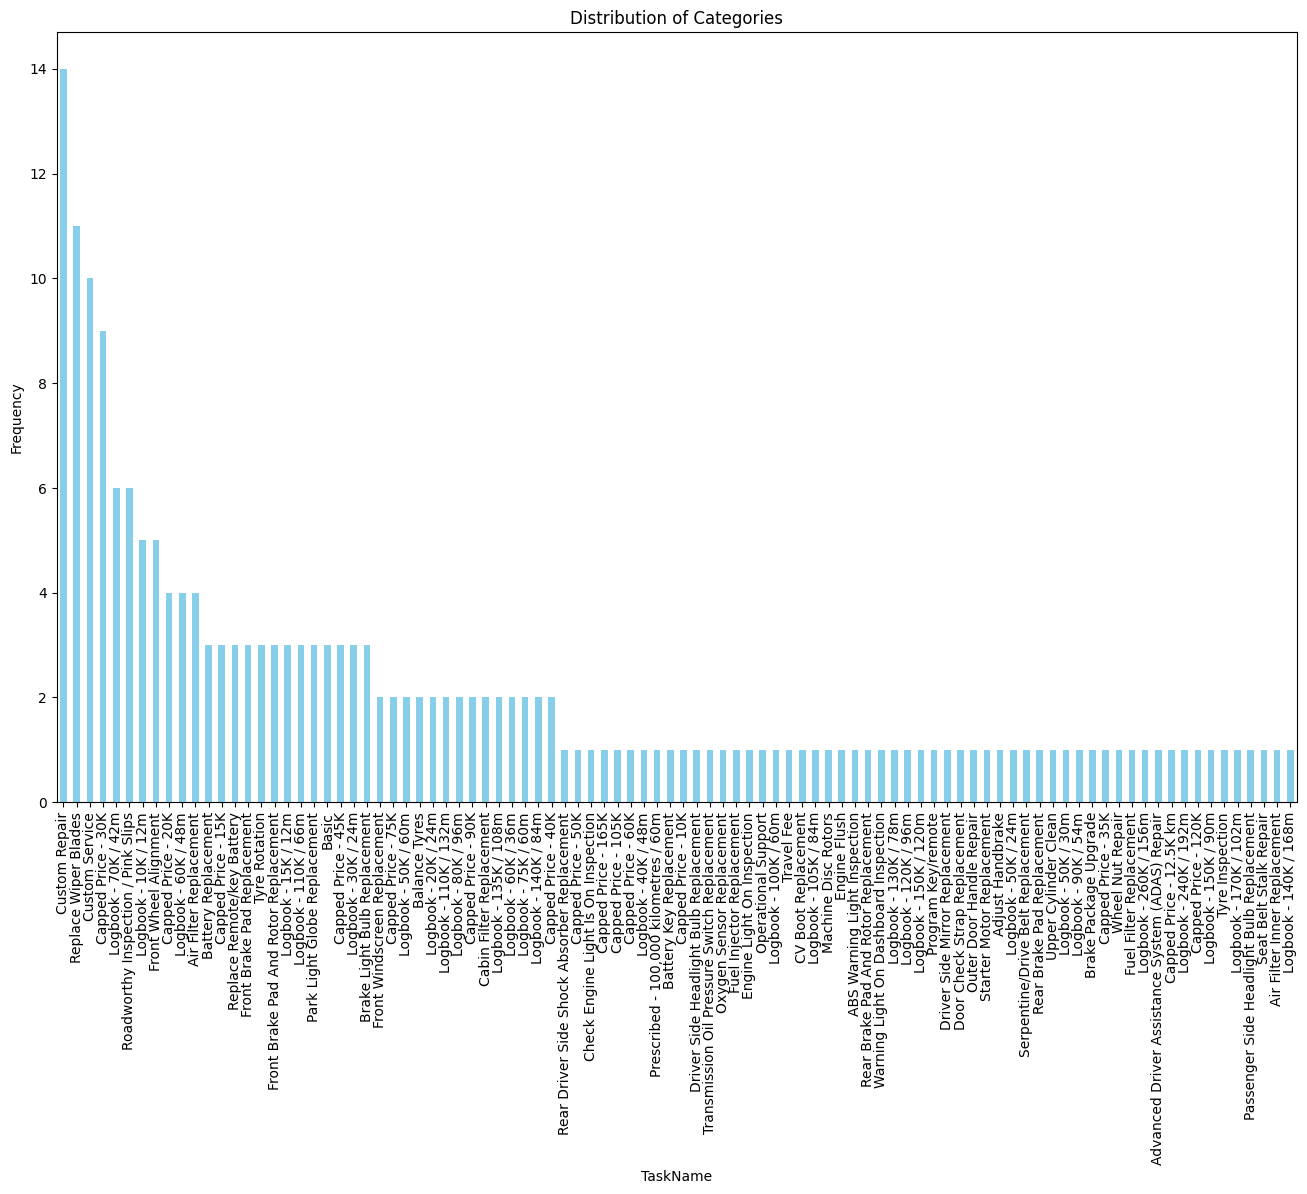

In [ ]:
# Count frequency of each category
counts = merged_df['TaskName'].value_counts()

# Plot
plt.figure(figsize=(16, 10))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('TaskName')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

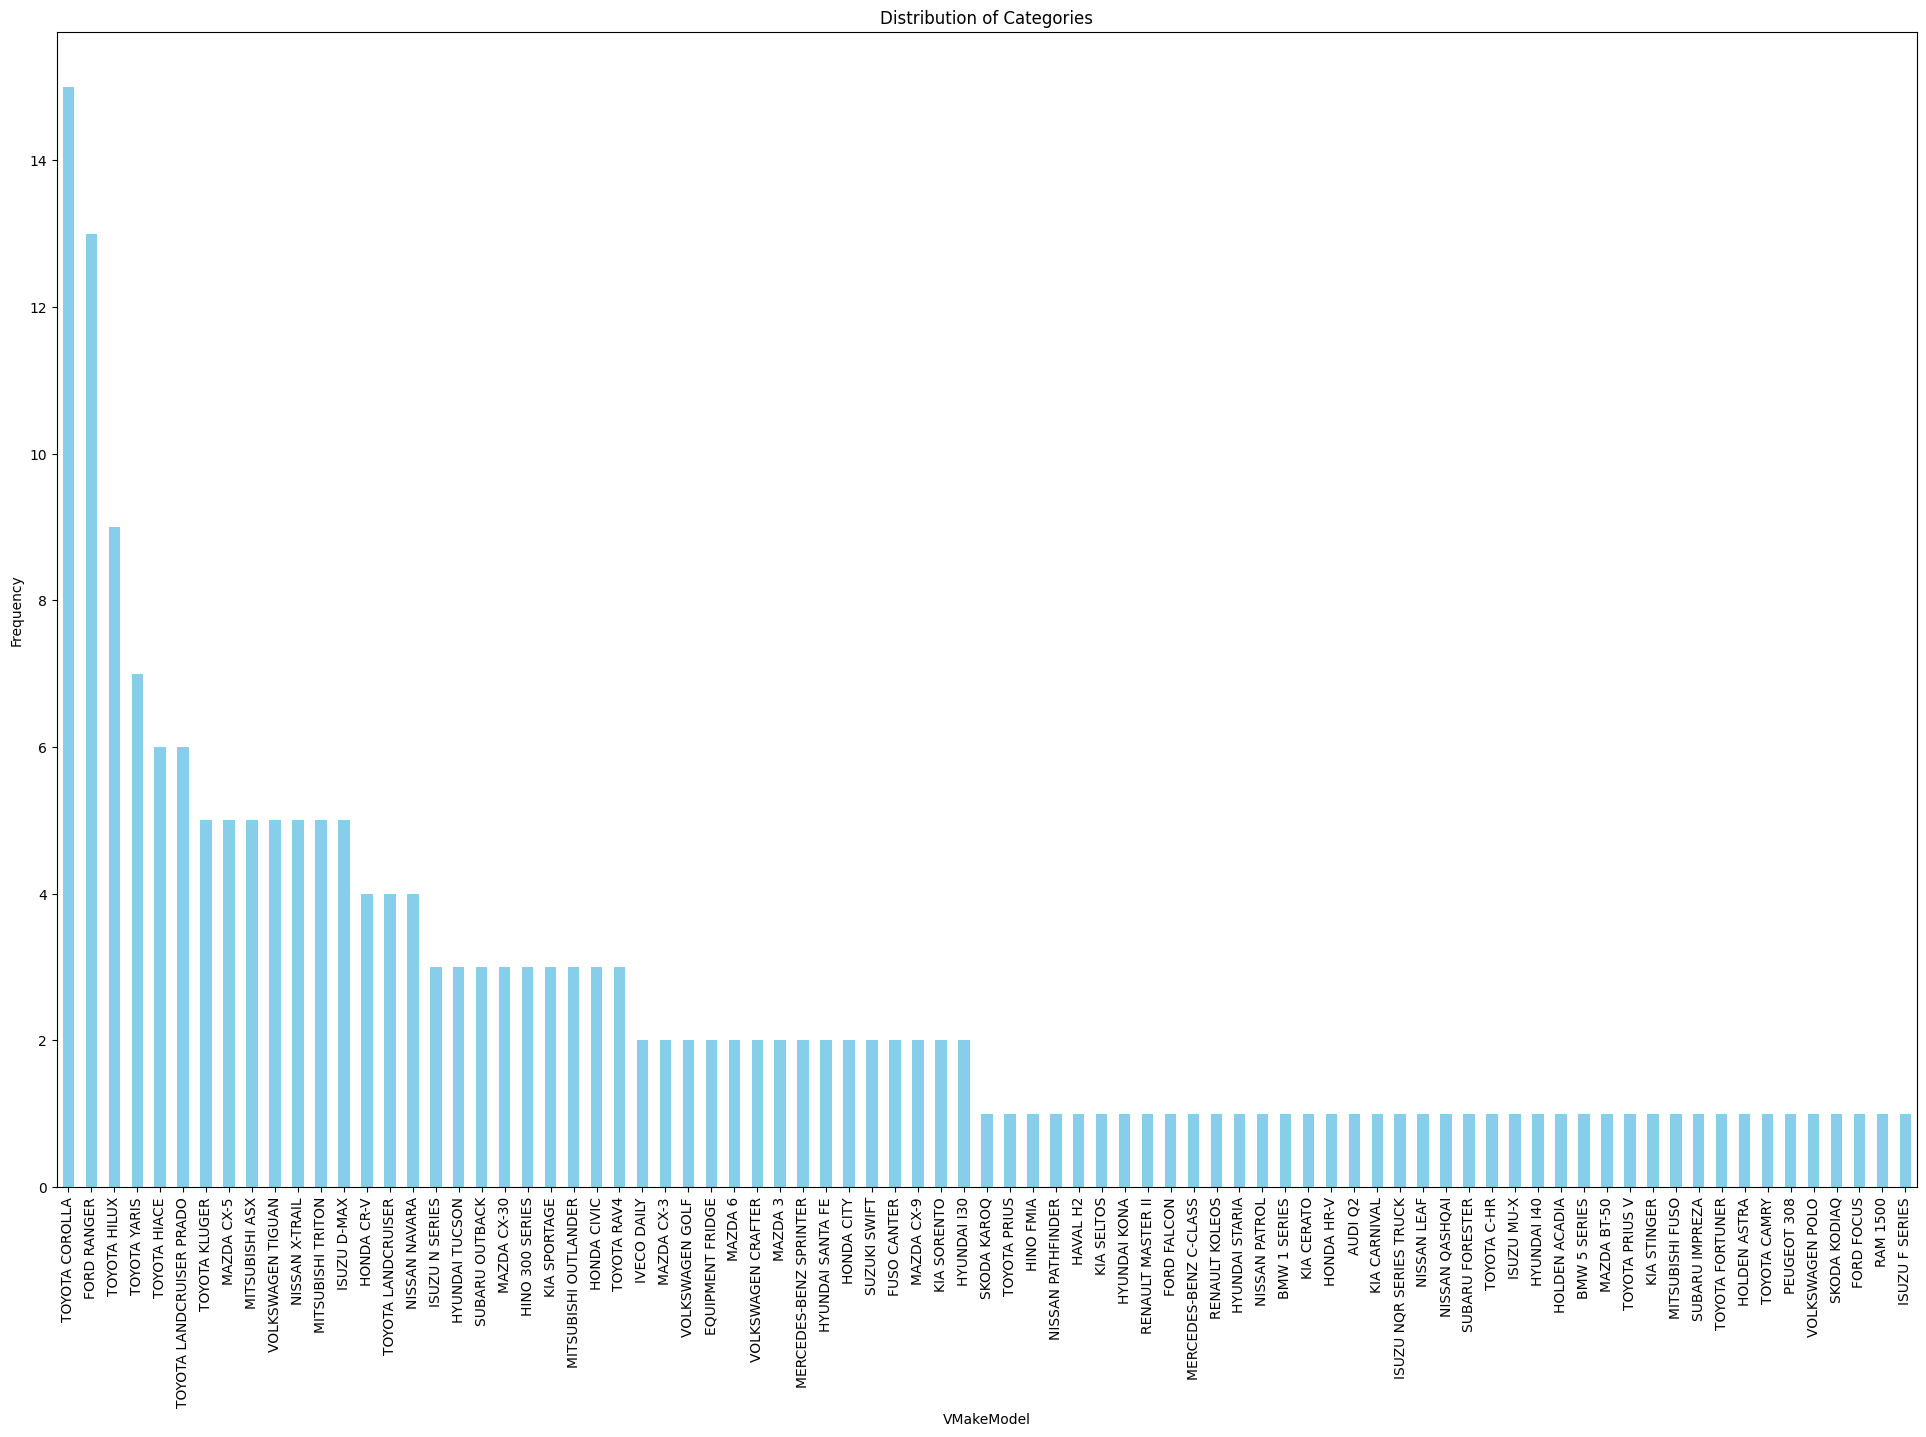

In [ ]:
# Count frequency of each category
counts = merged_df['VMakeModel'].value_counts()

# Plot
plt.figure(figsize=(24, 15))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('VMakeModel')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
counts = merged_df['VYMM'].value_counts()

# Plot
plt.figure(figsize=(24, 15))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('VYMM')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

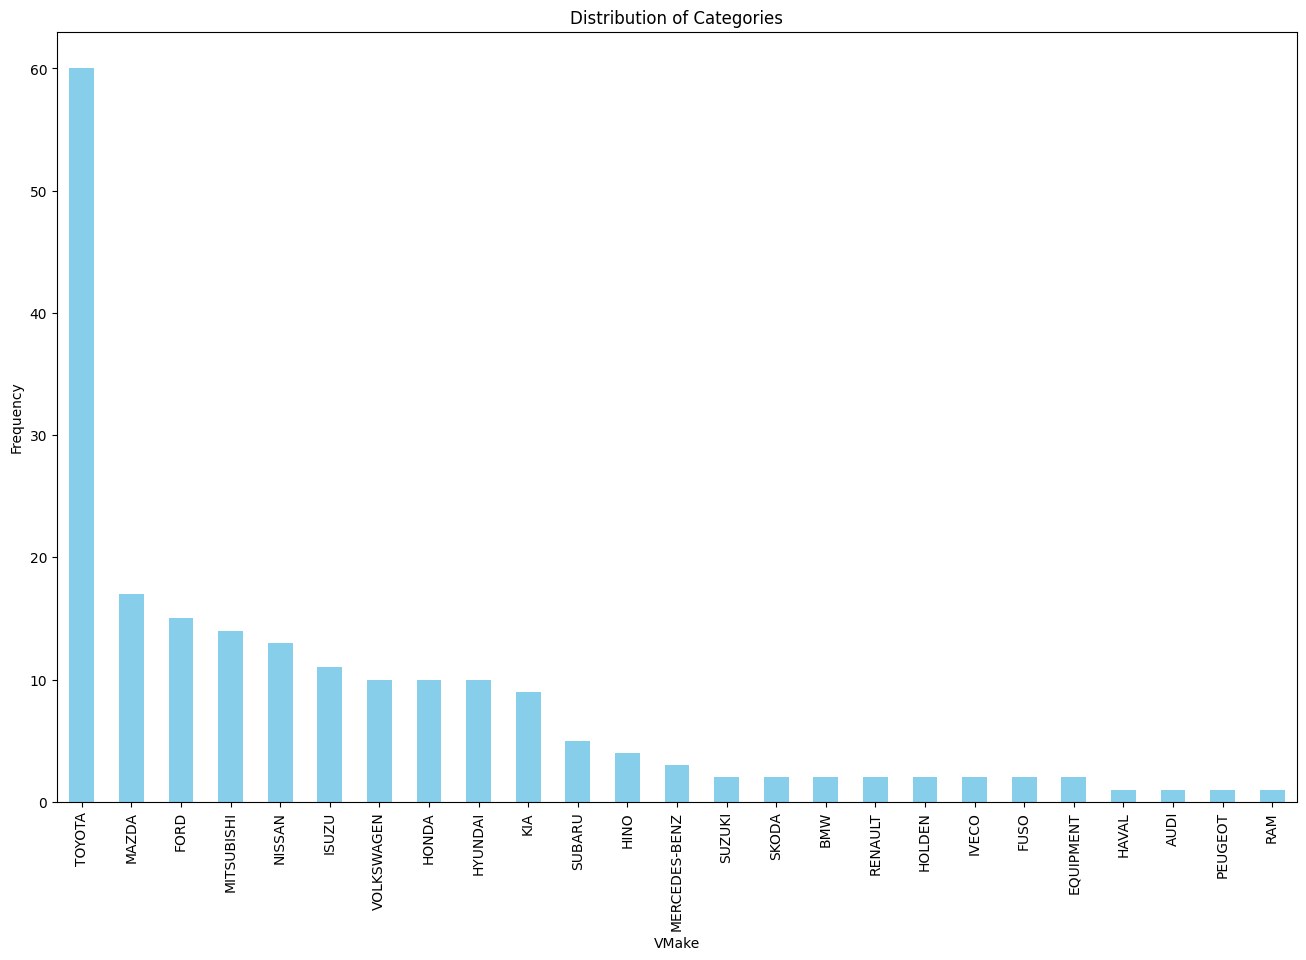

In [ ]:
# Count frequency of each category
counts = merged_df['VMake'].value_counts()

# Plot
plt.figure(figsize=(16, 10))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('VMake')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

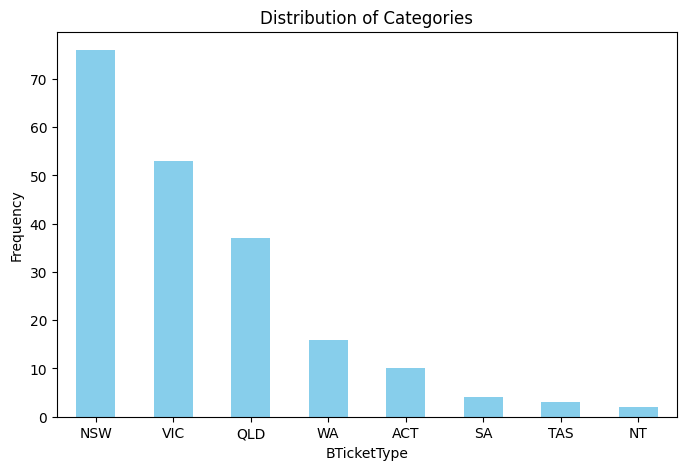

In [ ]:
# Count frequency of each category
counts = merged_df['BShopState'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('BTicketType')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

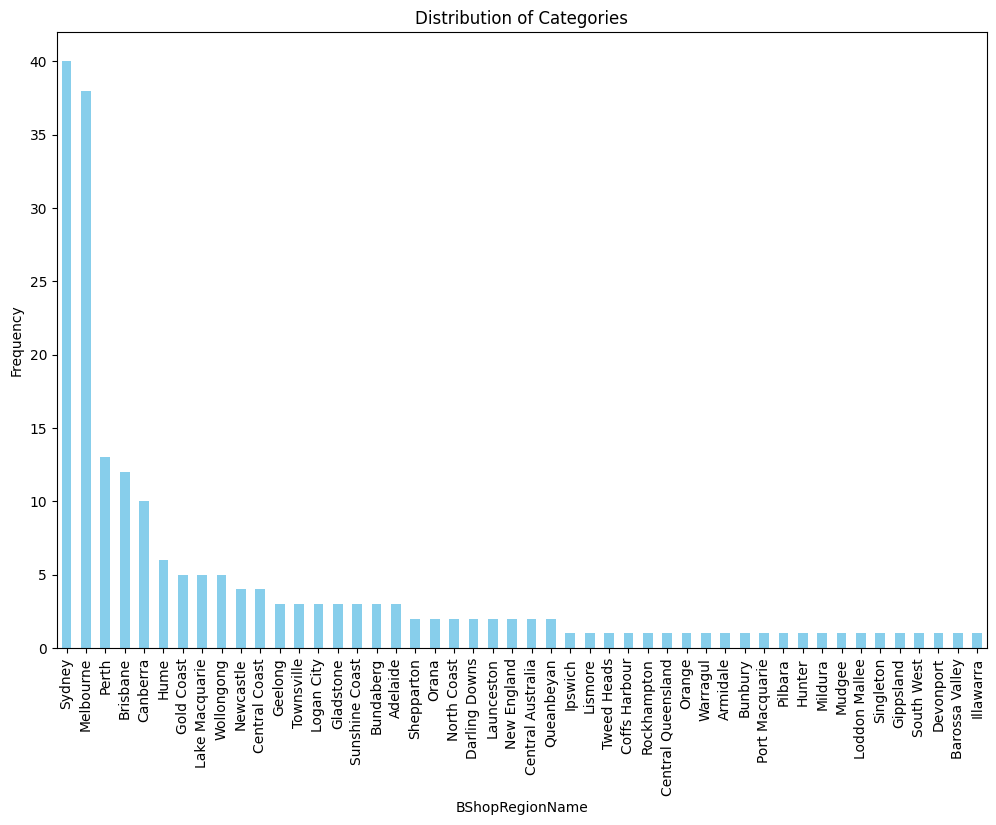

In [ ]:
# Count frequency of each category
counts = merged_df['BShopRegionName'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('BShopRegionName')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Data Splitting

In [ ]:
#Drop the columns with less meaningful information
merged_df = merged_df.drop(columns=['PriceIncGSTRaw', 'BookingID', 'BTicketID', 'BShopPostcode', 'CPI', 'BShopRegionClass'])

# Regression models and NN benefit from the encoding, other models can use the quarter feature as is
merged_df['Quarter'] = df['BCreatedDateAEST'].dt.quarter;
merged_df['Quarter_encoded'] = df['BCreatedDateAEST'].dt.quarter;

#Splitting data
train_X = merged_df.loc[1:201]
train_Y = merged_df.loc[1:201, 'adjusted_price']

val_X = merged_df.loc[201:226]
val_Y = merged_df.loc[201:226, 'adjusted_price']

test_X = merged_df.loc[226:251]
test_Y = merged_df.loc[226:251, 'adjusted_price']

print(train_X.columns)
print(val_X.columns)
print(test_X.columns)

Index(['FCID', 'BCreatedDateAEST', 'BTicketType', 'TaskName',
       'IsCustomService', 'IsCustomRepair', 'VYMM', 'VMakeModel', 'VMake',
       'VYear', 'BShopID', 'BShopState', 'BShopRegionName', 'Quarter',
       'adjusted_price', 'Quarter_encoded'],
      dtype='object')
Index(['FCID', 'BCreatedDateAEST', 'BTicketType', 'TaskName',
       'IsCustomService', 'IsCustomRepair', 'VYMM', 'VMakeModel', 'VMake',
       'VYear', 'BShopID', 'BShopState', 'BShopRegionName', 'Quarter',
       'adjusted_price', 'Quarter_encoded'],
      dtype='object')
Index(['FCID', 'BCreatedDateAEST', 'BTicketType', 'TaskName',
       'IsCustomService', 'IsCustomRepair', 'VYMM', 'VMakeModel', 'VMake',
       'VYear', 'BShopID', 'BShopState', 'BShopRegionName', 'Quarter',
       'adjusted_price', 'Quarter_encoded'],
      dtype='object')


In [ ]:
#Binary Encodes Task name, VYMM, VMake and Shop region name
binary_encoder = ce.BinaryEncoder(cols=['TaskName', 'VYMM', 'VMake', 'VMakeModel', 'BShopRegionName', 'BShopID'])
Binary_train_X = binary_encoder.fit_transform(train_X)
Binary_val_X = binary_encoder.transform(val_X)
Binary_test_X = binary_encoder.transform(test_X)
print("After Binary Encoding (train_X columns):", Binary_train_X.columns)

#One Hot Encodes ticket type and shop state
onehot_encoder = ce.OneHotEncoder(cols=['BTicketType', 'BShopState', 'FCID', 'Quarter_encoded'])
Encoded_train_X = onehot_encoder.fit_transform(Binary_train_X)
Encoded_val_X = onehot_encoder.transform(Binary_val_X)
Encoded_test_X = onehot_encoder.transform(Binary_test_X)
print("After OneHot Encoding (train_X columns):", Encoded_train_X.columns)

#Encoded_train_X.head()
#Encoded_val_X.head()
#Encoded_test_X.head()

#When data is split, ensure that fit is ONLY applied to the train dataset, then proceed to transform both train and test.

After Binary Encoding (train_X columns): Index(['FCID', 'BCreatedDateAEST', 'BTicketType', 'TaskName_0', 'TaskName_1',
       'TaskName_2', 'TaskName_3', 'TaskName_4', 'TaskName_5', 'TaskName_6',
       'IsCustomService', 'IsCustomRepair', 'VYMM_0', 'VYMM_1', 'VYMM_2',
       'VYMM_3', 'VYMM_4', 'VYMM_5', 'VYMM_6', 'VYMM_7', 'VMakeModel_0',
       'VMakeModel_1', 'VMakeModel_2', 'VMakeModel_3', 'VMakeModel_4',
       'VMakeModel_5', 'VMakeModel_6', 'VMake_0', 'VMake_1', 'VMake_2',
       'VMake_3', 'VMake_4', 'VYear', 'BShopID_0', 'BShopID_1', 'BShopID_2',
       'BShopID_3', 'BShopID_4', 'BShopID_5', 'BShopID_6', 'BShopID_7',
       'BShopState', 'BShopRegionName_0', 'BShopRegionName_1',
       'BShopRegionName_2', 'BShopRegionName_3', 'BShopRegionName_4',
       'BShopRegionName_5', 'Quarter', 'adjusted_price', 'Quarter_encoded'],
      dtype='object')
After OneHot Encoding (train_X columns): Index(['FCID_1', 'FCID_2', 'FCID_3', 'BCreatedDateAEST', 'BTicketType_1',
       'BTicketTyp

/tmp/ipykernel_2828/1511904101.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(numerical_cols.values, labels=numerical_cols.columns, vert=True)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]),
 [Text(1, 0, 'BTicketType_1'),
  Text(2, 0, 'BTicketType_2'),
  Text(3, 0, 'BTicketType_3'),
  Text(4, 0, 'BTicketType_4'),
  Text(5, 0, 'BTicketType_5'),
  Text(6, 0, 'BTicketType_6'),
  Text(7, 0, 'TaskName_0'),
  Text(8, 0, 'TaskName_1'),
  Text(9, 0, 'TaskName_2'),
  Text(10, 0, 'TaskName_3'),
  Text(11, 0, 'TaskName_4'),
  Text(12, 0, 'TaskName_5'),
  Text(13, 0, 'TaskName_6'),
  Text(14, 0, 'IsCustomService'),
  Text(15, 0, 'IsCustomRepair'),
  Text(16, 0, 'PriceIncGSTRaw'),
  Text(17, 0, 'VYMM_0'),
  Text(18, 0, 'VYMM_1'),
  Text(19, 0, 'VYMM_2'),
  Text(20, 0, 'VYMM_3'),
  Text(21, 0, 'VYMM_4'),
  Text(22, 0, 'VYMM_5'),
  Text(23, 0, 'VYMM_6'),
  Text(24, 0, 'VYMM_7'),
  Text(25, 0, 'VMakeModel_0'),
  Text(26, 0, 'VMakeModel_1'),
  Text(27,

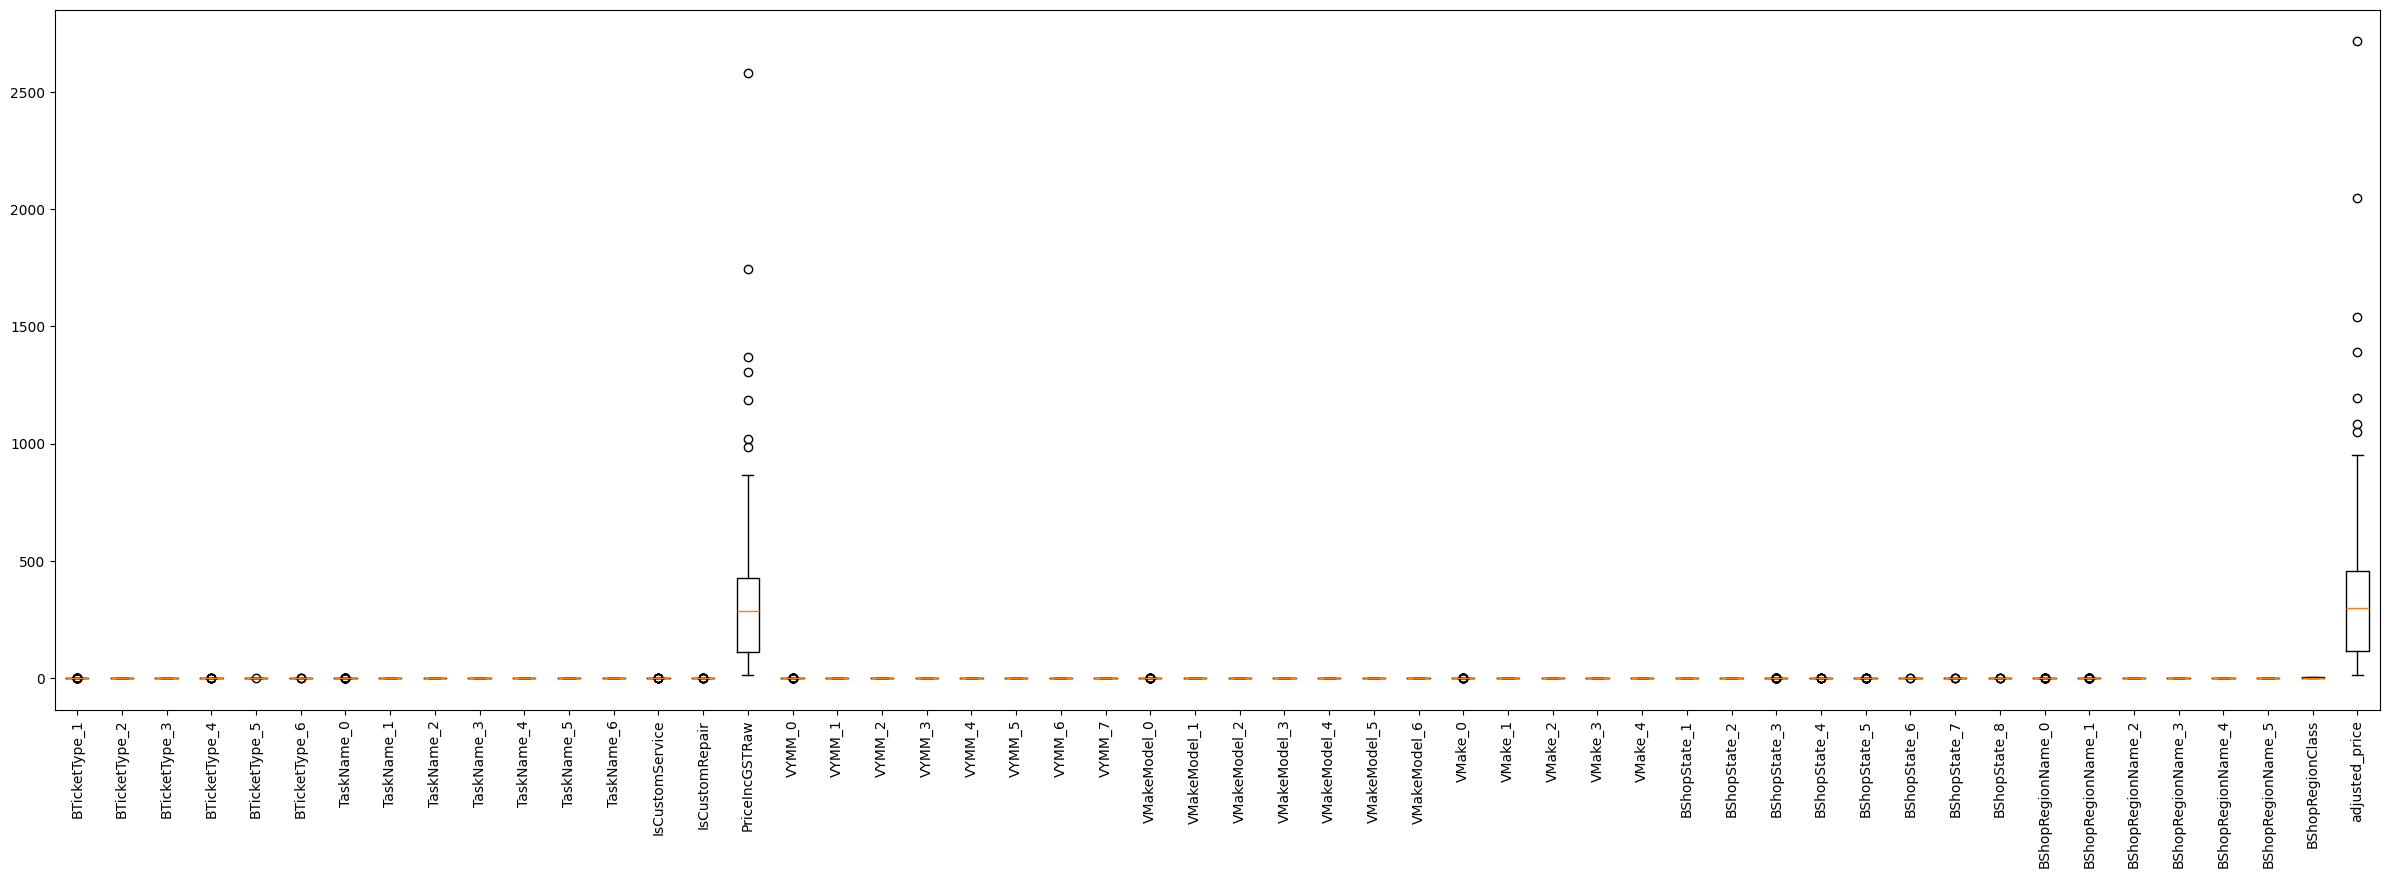

In [23]:
fig = plt.figure(figsize=[30, 20])
ax = fig.add_subplot(2, 1, 1)

# Exclude columns with unique types
# Also exclude ID cols as they should not be standardised
numerical_cols = Encoded_train_X.loc[:, ~Encoded_train_X.columns.isin([
    'BCreatedDateAEST', 'Quarter', 'BookingID', 'BTicketID', 'FCID', 'BShopID', 'BShopPostcode', 'VYear', 'CPI'
])]

ax.boxplot(numerical_cols.values, labels=numerical_cols.columns, vert=True)
plt.xticks(rotation=90) 


Code ranges and scales vary significantly between features. This indicates that standardisation and normalisation may have a signficant impact on performance depending on the model used.

Standardisation should be used for gradient-based models (NN, Log Regression, Gradient Boosted)

[Text(1, 0, 'PriceIncGSTRaw'),
 Text(2, 0, 'adjusted_price'),
 Text(3, 0, 'BTicketType_1'),
 Text(4, 0, 'BTicketType_2'),
 Text(5, 0, 'BTicketType_3'),
 Text(6, 0, 'BTicketType_4'),
 Text(7, 0, 'BTicketType_5'),
 Text(8, 0, 'BTicketType_6'),
 Text(9, 0, 'TaskName_0'),
 Text(10, 0, 'TaskName_1'),
 Text(11, 0, 'TaskName_2'),
 Text(12, 0, 'TaskName_3'),
 Text(13, 0, 'TaskName_4'),
 Text(14, 0, 'TaskName_5'),
 Text(15, 0, 'TaskName_6'),
 Text(16, 0, 'IsCustomService'),
 Text(17, 0, 'IsCustomRepair'),
 Text(18, 0, 'VYMM_0'),
 Text(19, 0, 'VYMM_1'),
 Text(20, 0, 'VYMM_2'),
 Text(21, 0, 'VYMM_3'),
 Text(22, 0, 'VYMM_4'),
 Text(23, 0, 'VYMM_5'),
 Text(24, 0, 'VYMM_6'),
 Text(25, 0, 'VYMM_7'),
 Text(26, 0, 'VMakeModel_0'),
 Text(27, 0, 'VMakeModel_1'),
 Text(28, 0, 'VMakeModel_2'),
 Text(29, 0, 'VMakeModel_3'),
 Text(30, 0, 'VMakeModel_4'),
 Text(31, 0, 'VMakeModel_5'),
 Text(32, 0, 'VMakeModel_6'),
 Text(33, 0, 'VMake_0'),
 Text(34, 0, 'VMake_1'),
 Text(35, 0, 'VMake_2'),
 Text(36, 0, 'VMake_3

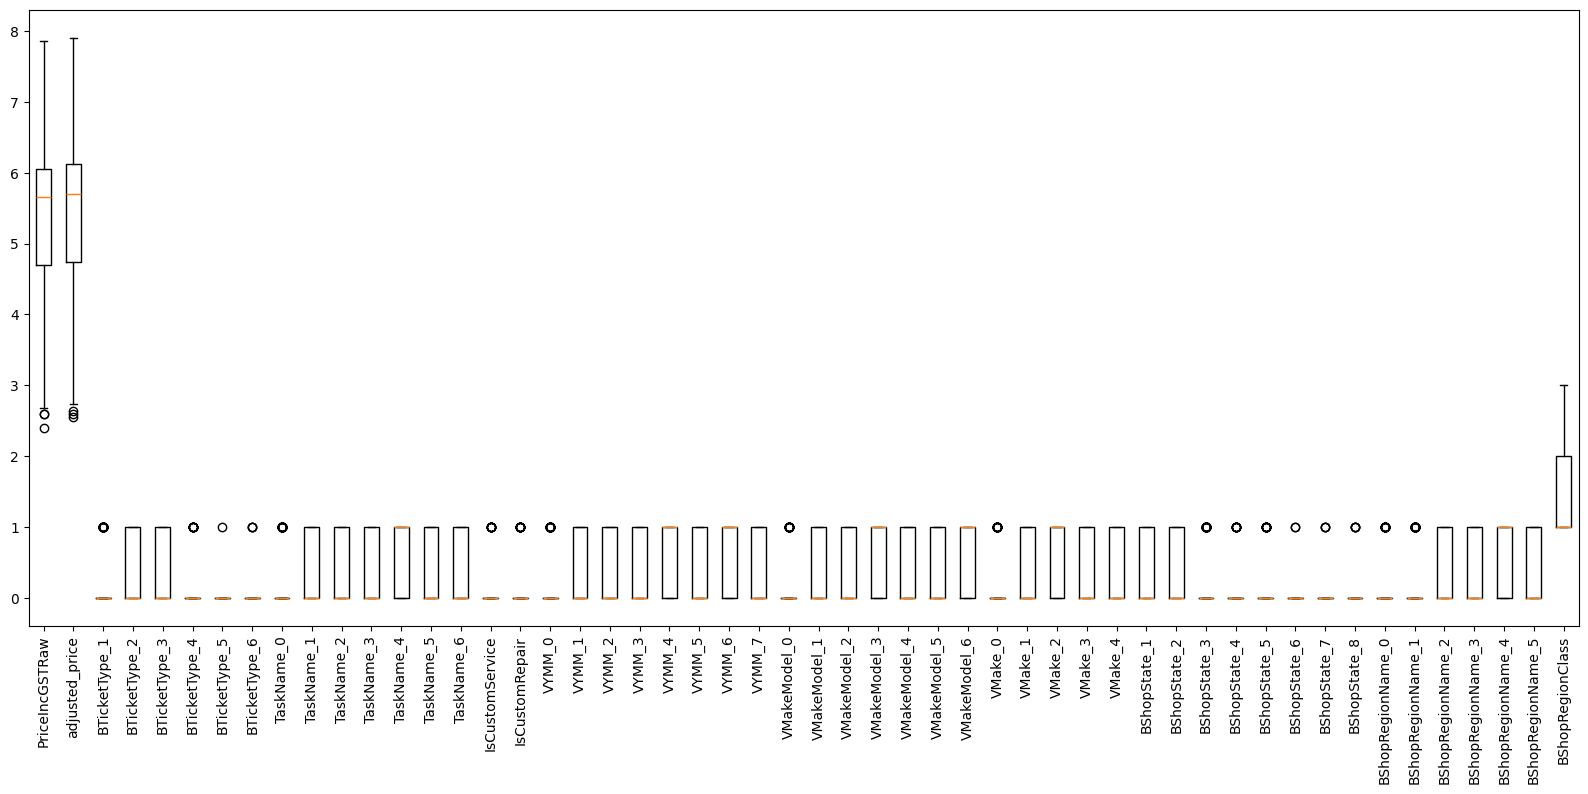

In [24]:
# Scale price features 
# Select only the features that are not of binary type
int_cols = Encoded_train_X[['PriceIncGSTRaw', 'adjusted_price']]

# Apply standardisation to the selected columns
X_scaled = np.log1p(int_cols)
other_cols = numerical_cols.drop(columns=['PriceIncGSTRaw', 'adjusted_price'])

combined_cols = pd.concat([X_scaled, other_cols], axis=1)

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(combined_cols.values);
ax.set_xticklabels(combined_cols.columns, rotation=90)

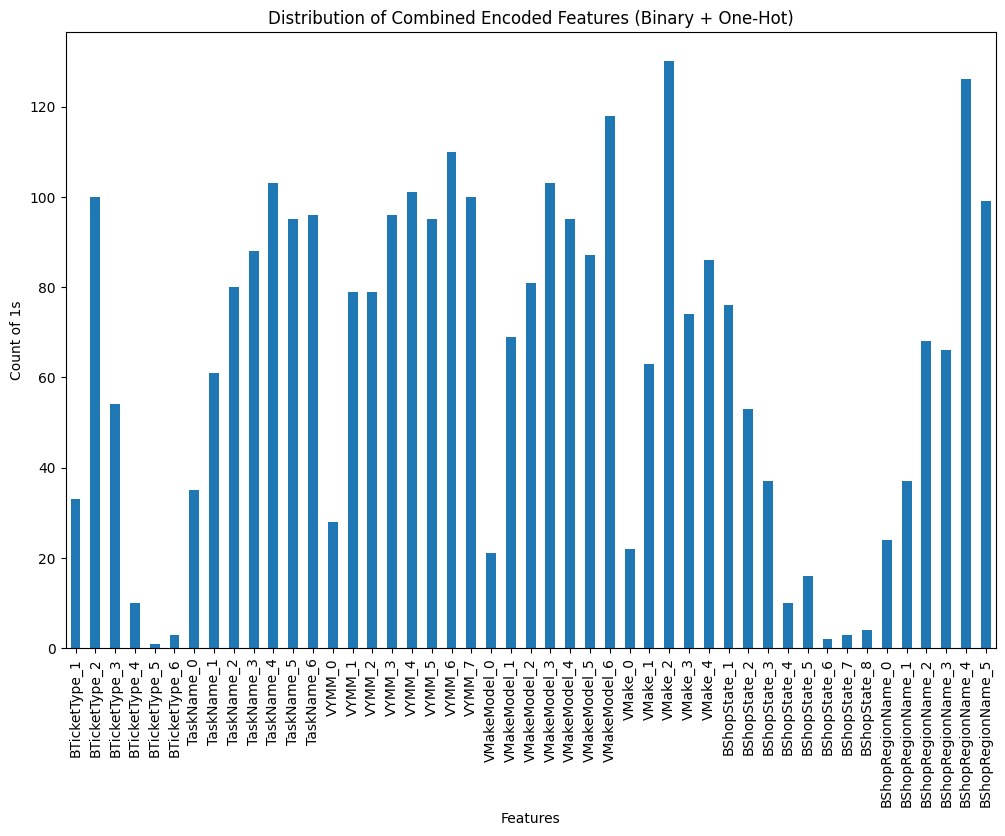

In [ ]:
#Exclude features that have not been encoded
Encoded_train_X_cat = Encoded_train_X.loc[:, ~Encoded_train_X.columns.isin(['BCreatedDateAEST', 'Quarter', 'BookingID', 'BTicketID', 'BShopID', 'VYear', 'BShopPostcode', 'CPI', 'adjusted_price', 'PriceIncGSTRaw', 'FCID', 'BShopRegionClass', 'IsCustomService', 'IsCustomRepair'])]

Encoded_train_X_cat.sum().plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Combined Encoded Features (Binary + One-Hot)')
plt.xlabel('Features')
plt.ylabel('Count of 1s')
plt.show()